In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("House Price Prediction Dataset.csv")

In [55]:
print(df.head())
print(df.dtypes)

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
Id           int64
Area         int64
Bedrooms     int64
Bathrooms    int64
Floors       int64
YearBuilt    int64
Location       str
Condition      str
Garage         str
Price        int64
dtype: object


In [56]:

df = df.drop('Id', axis=1)


df['Location'] = df['Location'].astype('category').cat.codes
df['Condition'] = df['Condition'].astype('category').cat.codes
df['Garage'] = df['Garage'].astype('category').cat.codes

df = (df - df.mean()) / df.std()

print("Pre-processing complete. All data is now numerical and scaled.")

Pre-processing complete. All data is now numerical and scaled.


In [57]:

y = df['Price'].values.reshape(-1, 1)


X = df.drop('Price', axis=1).values

m, n = X.shape

print(f"Data points (m): {m}, Features (n): {n}")

Data points (m): 2000, Features (n): 8


In [58]:

w = np.zeros((n, 1))
b = 0.0


learning_rate = 0.01
iterations = 2000

In [59]:
cost_history = []

for i in range(iterations):
    
    predictions = np.dot(X, w) + b
    
    
    error = predictions - y
    
   
    cost = (1 / (2 * m)) * np.sum(np.square(error))
    cost_history.append(cost)
    
    
    dw = (1 / m) * np.dot(X.T, error)
    db = (1 / m) * np.sum(error)
    
   
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
   
    if i % 200 == 0:
        print(f"Iteration {i}: Cost = {cost}")

print("Training finished!")

Iteration 0: Cost = 0.49975
Iteration 200: Cost = 0.4978441742556693
Iteration 400: Cost = 0.4978060398207771
Iteration 600: Cost = 0.49780526852763973
Iteration 800: Cost = 0.49780525279086524
Iteration 1000: Cost = 0.4978052524674545
Iteration 1200: Cost = 0.49780525246076696
Iteration 1400: Cost = 0.4978052524606279
Iteration 1600: Cost = 0.497805252460625
Iteration 1800: Cost = 0.497805252460625
Training finished!


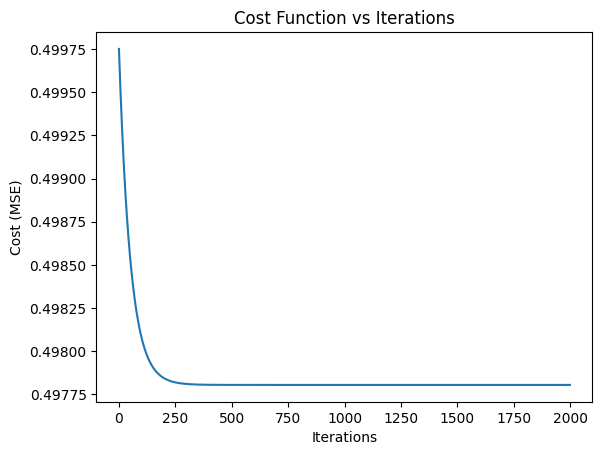

In [60]:
plt.plot(range(iterations), cost_history)
plt.title('Cost Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()

In [ ]:
import numpy as np

def predict_house_price(user_input_list, w, b, df_original):
    """
    user_input_list: List of features [Area, Bedrooms, Bathrooms, Floors, YearBuilt, Location, Condition, Garage]
    w: Your trained Weights from Gradient Descent
    b: Your trained Bias from Gradient Descent
    df_original: The original DataFrame (needed to access mean and std for scaling)
    """
    
    # 1. Convert user input into a NumPy array
    x_input = np.array(user_input_list, dtype=float)
    
    # 2. Feature Scaling (Z-score Normalization)
    # We must scale the input exactly how we scaled the training data
    features_only = df_original.drop('Price', axis=1)
    mean_val = features_only.mean().values
    std_val = features_only.std().values
    
    x_scaled = (x_input - mean_val) / std_val
    
    # 3. Model Prediction (The Linear Regression Formula: f = X.w + b)
    prediction_scaled = np.dot(x_scaled, w) + b
    
    # 4. De-normalization (Converting the scaled result back to actual Price)
    price_mean = df_original['Price'].mean()
    price_std = df_original['Price'].std()
    
    final_price = (prediction_scaled * price_std) + price_mean
    
    return final_price[0]

# --- User Input Section ---
print("--- Enter New House Details for Prediction ---")
try:
    area   = float(input("Area (sq ft): "))
    beds   = float(input("Bedrooms: "))
    baths  = float(input("Bathrooms: "))
    floors = float(input("Floors: "))
    year   = float(input("Year Built: "))
    loc    = float(input("Location Code (numeric, e.g., 0, 1, 2): "))
    cond   = float(input("Condition Code (numeric): "))
    garage = float(input("Garage (0 for No, 1 for Yes): "))

    # Organize inputs into a list
    my_house_features = [area, beds, baths, floors, year, loc, cond, garage]

    # Calculate the price using the trained parameters w and b
    estimated_price = predict_house_price(my_house_features, w, b, df)

    print("\n" + "="*40)
    print(f" Estimated House Price: ${estimated_price:,.2f}")
    print("="*40)

except Exception as e:
    print(f"\n Invalid input! Error: {e}")

--- Enter New House Details for Prediction ---
